<a href="https://colab.research.google.com/github/afrojaakter/Surrogate-Based-Optimization/blob/main/Surrogate_modeling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####SMT: Surrogate Modeling Toolbox
SMT contains the surrogate modeling methods listed below.

- Radial basis functions
- Least-squares approximation
- Second-order polynomial approximation
- Kriging
- KPLS
- KPLSK
- GEKPLS
- GENN

In [ ]:
!pip install smt

     |████████████████████████████████| 248 kB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 6.2 MB/s 
  Created wheel for smt: filename=smt-1.0.0-cp37-cp37m-linux_x86_64.whl size=522120 sha256=c1603ada2b172ef866c533d585965f760fe7d34ec8d590d0202916ddf2781531
  Stored in directory: /root/.cache/pip/wheels/42/e6/ef/c78c5dc521a6d99898ea8842ffcdfb4d8854f39af1a438bc7a
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25538 sha256=22656dcb6ea35990fdff862d2517902c298e7a312dbb8ec2fc5e82f6dd1a96a3
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built smt pyDOE2


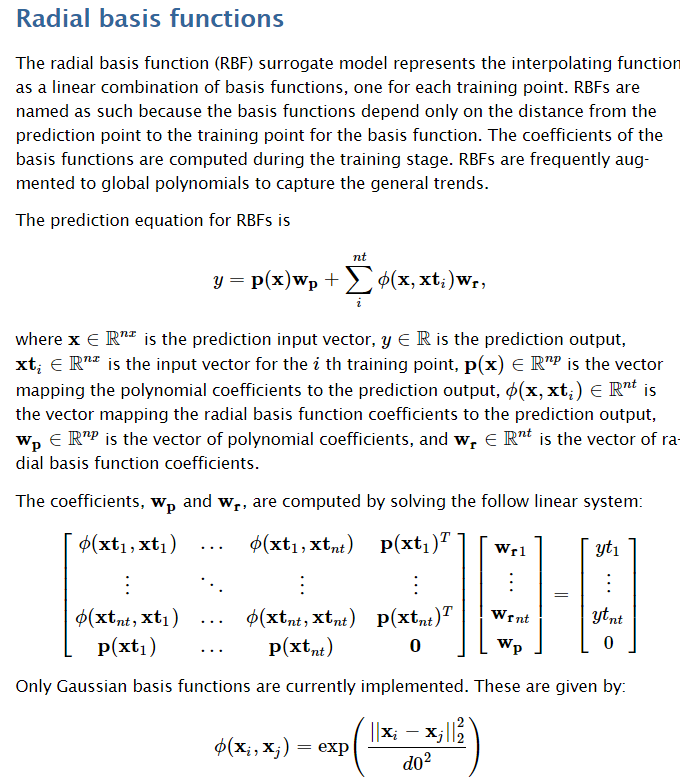

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (5 x 5 mtx) ...
         Performing LU fact. (5 x 5 mtx) - done. Time (sec):  0.0000648
      Initializing linear solver - done. Time (sec):  0.0004330
      Solving linear system (col. 0) ...
         Back solving (5 x 5 mtx) ...
         Back solving (5 x 5 mtx) - done. Time (sec):  0.0000558
      Solving linear system (col. 0) - done. Time (sec):  0.0001631
   Training - done. Time (sec):  0.0015156
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting 

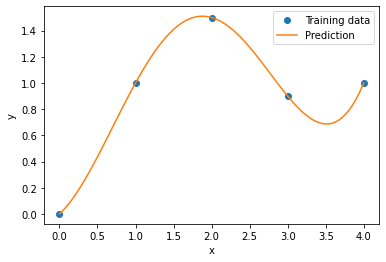

In [ ]:
# Radial basis functions
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import RBF

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = RBF(d0=5)
sm.set_training_values(xt, yt)
sm.train()

num = 100
x_test = np.linspace(0.0, 4.0, num)
y_pred = sm.predict_values(x_test)

plt.plot(xt, yt, "o")
plt.plot(x_test, y_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()

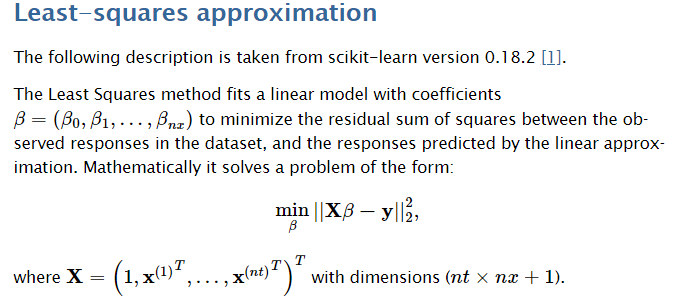

___________________________________________________________________________
   
                                    LS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0138721
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0001683
   
   Prediction time/pt. (sec) :  0.0000017
   


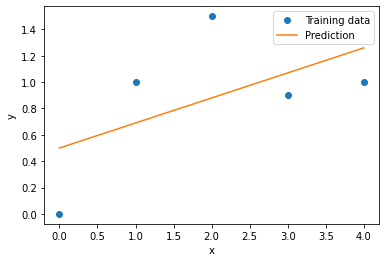

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import LS

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = LS()
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()

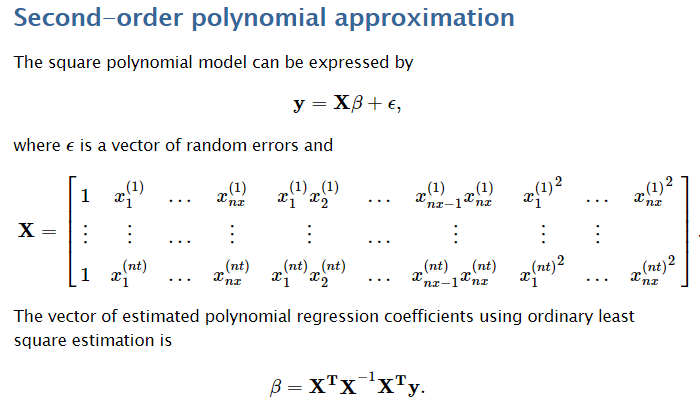

___________________________________________________________________________
   
                                    QP
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0009210
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0000918
   
   Prediction time/pt. (sec) :  0.0000009
   


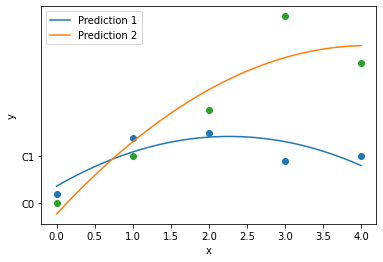

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import QP

xt = np.array([[0.0, 1.0, 2.0, 3.0, 4.0]]).T
yt = np.array([[0.2, 1.4, 1.5, 0.9, 1.0], [0.0, 1.0, 2.0, 4, 3]]).T

sm = QP()
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)

t1, _ = plt.plot(xt, yt[:, 0], "o", "C0")
p1 = plt.plot(x, y[:, 0], "C0", label="Prediction 1")
t2, _ = plt.plot(xt, yt[:, 1], "o", "C1")
p2 = plt.plot(x, y[:, 1], "C1", label="Prediction 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

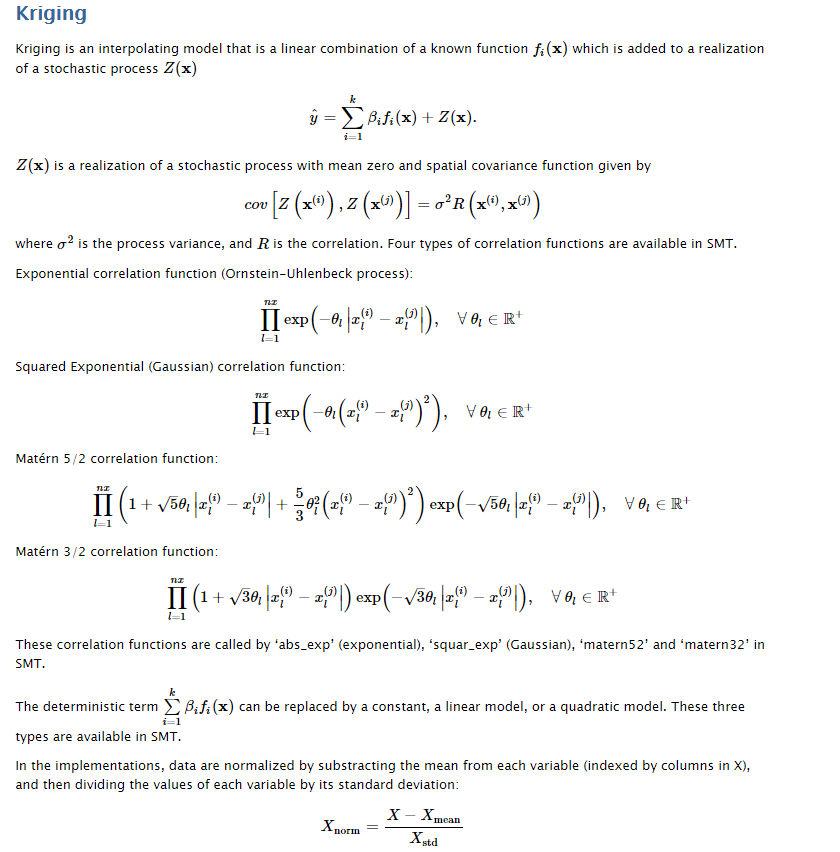

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0616612
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0003996
   
   Prediction time/pt. (sec) :  0.0000040
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 5
   
   Predicting ...
   Predicting - done. Time (sec):  0.0004559
   
   Prediction time/pt. (sec) :  0.0000912
   


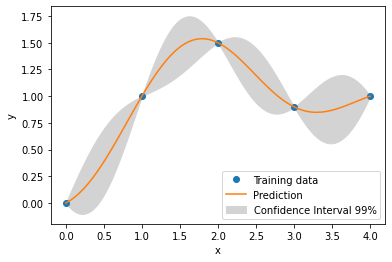

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KRG

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = KRG(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)
# derivative according to the first variable
dydx = sm.predict_derivatives(xt, 0)
fig, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 500
   
   Predicting ...
   Predicting - done. Time (sec):  0.0003710
   
   Prediction time/pt. (sec) :  0.0000007
   


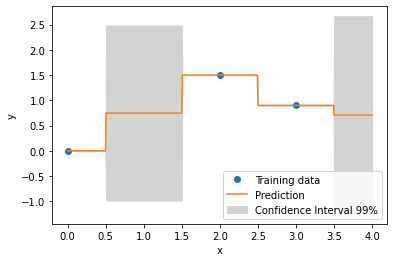

In [ ]:
# Example 2
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KRG
from smt.applications.mixed_integer import MixedIntegerSurrogateModel, INT

xt = np.array([0.0, 2.0, 3.0])
yt = np.array([0.0, 1.5, 0.9])

# xtypes = [FLOAT, INT, (ENUM, 3), (ENUM, 2)]
# FLOAT means x1 continuous
# INT means x2 integer
# (ENUM, 3) means x3, x4 & x5 are 3 levels of the same categorical variable
# (ENUM, 2) means x6 & x7 are 2 levels of the same categorical variable

sm = MixedIntegerSurrogateModel(
    xtypes=[INT], xlimits=[[0, 4]], surrogate=KRG(theta0=[1e-2])
)
sm.set_training_values(xt, yt)
sm.train()

num = 500
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)

fig, axs = plt.subplots(1)
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

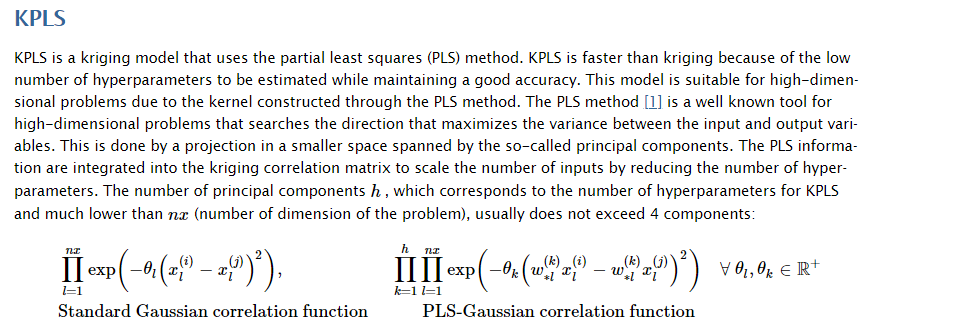

___________________________________________________________________________
   
                                   KPLS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0395904
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0003302
   
   Prediction time/pt. (sec) :  0.0000033
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 5
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002801
   
   Prediction time/pt. (sec) :  0.0000560
   


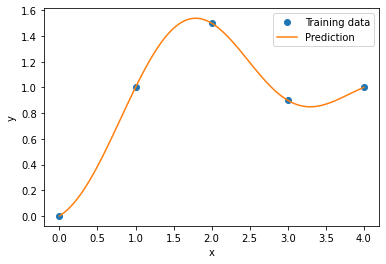

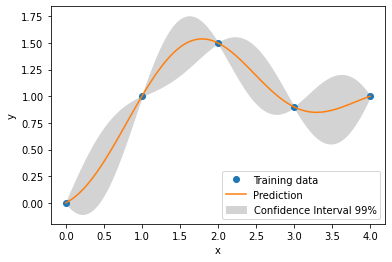

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KPLS

xt = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
yt = np.array([0.0, 1.0, 1.5, 0.9, 1.0])

sm = KPLS(theta0=[1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)
# to compute the derivative according to the first variable
dydx = sm.predict_derivatives(xt, 0)

plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction"])
plt.show()

# add a plot with variance
plt.plot(xt, yt, "o")
plt.plot(x, y)
plt.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Training data", "Prediction", "Confidence Interval 99%"])
plt.show()

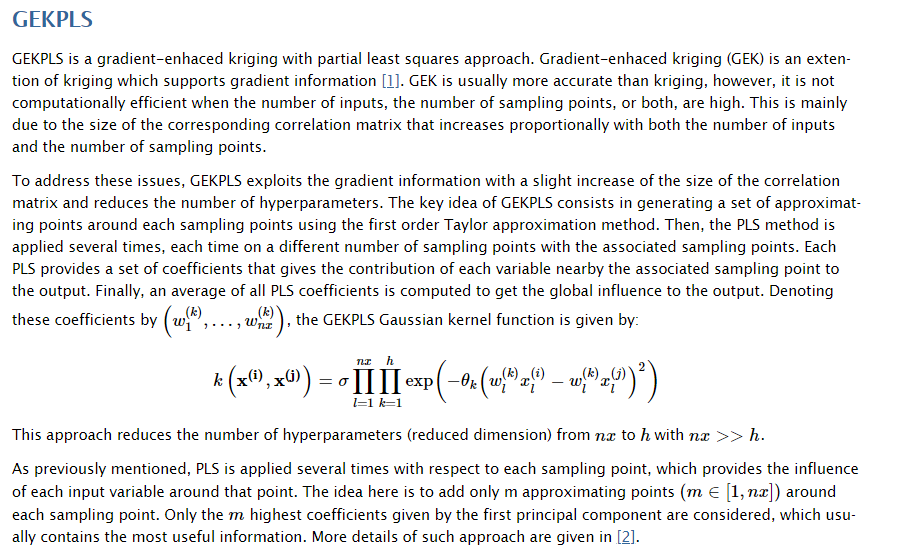

___________________________________________________________________________
   
                                   KPLS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 20
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1453643


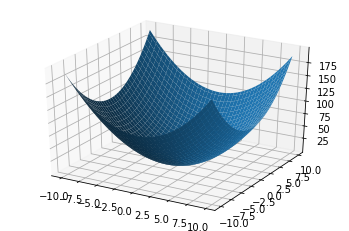

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from smt.surrogate_models import GEKPLS
from smt.problems import Sphere
from smt.sampling_methods import LHS

# Construction of the DOE
fun = Sphere(ndim=2)
sampling = LHS(xlimits=fun.xlimits, criterion="m")
xt = sampling(20)
yt = fun(xt)
# Compute the gradient
for i in range(2):
    yd = fun(xt, kx=i)
    yt = np.concatenate((yt, yd), axis=1)

# Build the GEKPLS model
sm = GEKPLS(
    theta0=[1e-2], xlimits=fun.xlimits, extra_points=1, print_prediction=False
)
sm.set_training_values(xt, yt[:, 0])
for i in range(2):
    sm.set_training_derivatives(xt, yt[:, 1 + i].reshape((yt.shape[0], 1)), i)
sm.train()

# Test the model
X = np.arange(fun.xlimits[0, 0], fun.xlimits[0, 1], 0.25)
Y = np.arange(fun.xlimits[1, 0], fun.xlimits[1, 1], 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.zeros((X.shape[0], X.shape[1]))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = sm.predict_values(
            np.hstack((X[i, j], Y[i, j])).reshape((1, 2))
        )

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, Z)

plt.show()

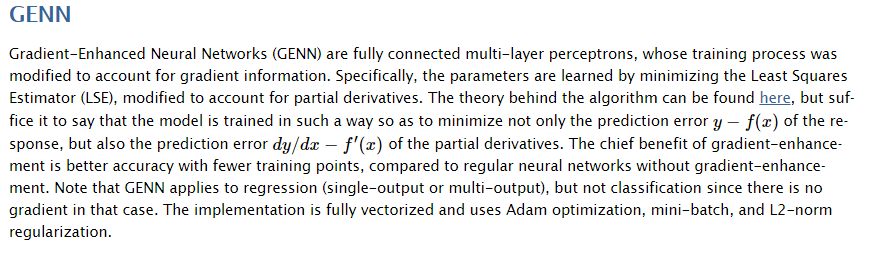

Limitations
Gradient-enhanced methods only apply to the special use-case of computer aided design, where data is generated synthetically using physics-based computer models, responses are continuous, and their gradient is defined. Furthermore, gradient enhancement is only beneficial when the cost of obtaining the gradient is not excessive in the first place. This is often true in computer-aided design with the advent of adjoint design methods for example, but it is not always the case. The user should therefore carefully weight the benefit of gradient-enhanced methods depending on the application.

___________________________________________________________________________
   
                                   GENN
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 4
   
___________________________________________________________________________
   
 Training
   
   Training ...
epoch = 0, mini-batch = 0, avg cost = 45.582
epoch = 1, mini-batch = 0, avg cost = 18.065
epoch = 2, mini-batch = 0, avg cost =  1.027
epoch = 3, mini-batch = 0, avg cost =  0.983
epoch = 4, mini-batch = 0, avg cost =  0.950
epoch = 5, mini-batch = 0, avg cost =  0.901
epoch = 6, mini-batch = 0, avg cost =  0.859
epoch = 7, mini-batch = 0, avg cost =  0.848
epoch = 8, mini-batch = 0, avg cost =  0.839
epoch = 9, mini-batch = 0, avg cost =  0.829
epoch = 10, mini-batch = 0, avg cost =  0.821
epoch = 11, mini-batch = 0, avg cost =  0.815
epoch = 12, mini-batch = 0, avg cost =  0.809
epoch = 13, mini-batch = 0, avg cost =  0.80

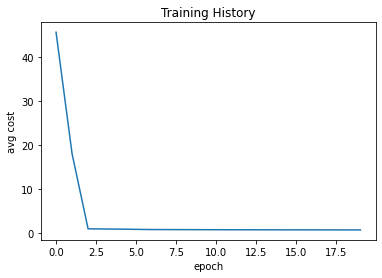

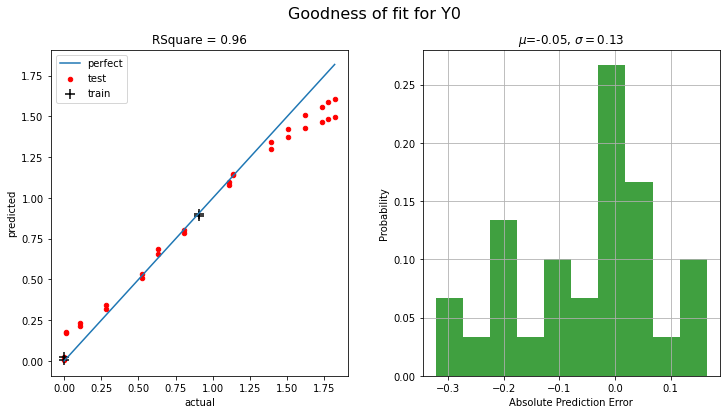

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 629
   
   Predicting ...
   Predicting - done. Time (sec):  0.0007877
   
   Prediction time/pt. (sec) :  0.0000013
   


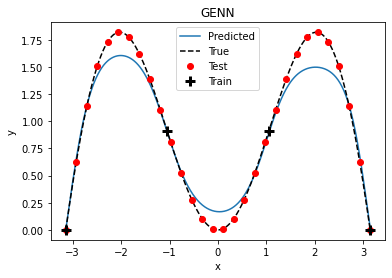

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from smt.surrogate_models.genn import GENN, load_smt_data

# Training data
lower_bound = -np.pi
upper_bound = np.pi
number_of_training_points = 4
xt = np.linspace(lower_bound, upper_bound, number_of_training_points)
yt = xt * np.sin(xt)
dyt_dxt = np.sin(xt) + xt * np.cos(xt)

# Validation data
number_of_validation_points = 30
xv = np.linspace(lower_bound, upper_bound, number_of_validation_points)
yv = xv * np.sin(xv)
dyv_dxv = np.sin(xv) + xv * np.cos(xv)

# Truth model
x = np.arange(lower_bound, upper_bound, 0.01)
y = x * np.sin(x)

# GENN
genn = GENN()
genn.options["alpha"] = 0.1  # learning rate that controls optimizer step size
genn.options["beta1"] = 0.9  # tuning parameter to control ADAM optimization
genn.options["beta2"] = 0.99  # tuning parameter to control ADAM optimization
genn.options[
    "lambd"
] = 0.1  # lambd = 0. = no regularization, lambd > 0 = regularization
genn.options[
    "gamma"
] = 1.0  # gamma = 0. = no grad-enhancement, gamma > 0 = grad-enhancement
genn.options["deep"] = 2  # number of hidden layers
genn.options["wide"] = 6  # number of nodes per hidden layer
genn.options[
    "mini_batch_size"
] = 64  # used to divide data into training batches (use for large data sets)
genn.options["num_epochs"] = 20  # number of passes through data
genn.options[
    "num_iterations"
] = 100  # number of optimizer iterations per mini-batch
genn.options["is_print"] = True  # print output (or not)
load_smt_data(
    genn, xt, yt, dyt_dxt
)  # convenience function to read in data that is in SMT format
genn.train()  # API function to train model
genn.plot_training_history()  # non-API function to plot training history (to check convergence)
genn.goodness_of_fit(
    xv, yv, dyv_dxv
)  # non-API function to check accuracy of regression
y_pred = genn.predict_values(
    x
)  # API function to predict values at new (unseen) points

# Plot
fig, ax = plt.subplots()
ax.plot(x, y_pred)
ax.plot(x, y, "k--")
ax.plot(xv, yv, "ro")
ax.plot(xt, yt, "k+", mew=3, ms=10)
ax.set(xlabel="x", ylabel="y", title="GENN")
ax.legend(["Predicted", "True", "Test", "Train"])
plt.show()

###Reference
[SMT: Surrogate Modeling Toolbox](https://smt.readthedocs.io/en/latest/index.html#)